
Xây dựng mô hình học máy với thuật toán KNN dự đoán một bệnh nhân u vú là lành tính hay ác tính. Sinh viên sử dụng tập 961 bệnh nhân u vú đã xử lý ở Chương 2; 

1. Kiểm tra mức độ cân bằng dữ liệu

2. Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng

3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 75% - 25%

4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán K người láng giềng gần nhất (KNN). Tùy chỉnh tham số n_neighbors, weight, p để thu được mô hình có độ chính xác tốt nhất trên tập Train và Test.

**Hiển thị các kết quả sau của model:**

    a)Độ chính xác của model (accuracy) trên tập Train – Test
    b)Tổng số mẫu dự đoán đúng - sai trên tập Test 
    c)Ma trận confusion matrix trên tập Test

5. Dự đoán với mô hình xây dựng được
- Bệnh nhân 1 có các thông số như sau:

    * Age:  20 tuổi;
    * Weight: 65 Kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: Low

- Bệnh nhân 2 có các thông số như sau:  
    * Age:  64 tuổi;
    * Weight: 75 kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: High

Sử dụng model ở trên dự đoán xem bệnh nhân 1, 2  này bị u lành tính  hay ác tính;





In [1]:
#Gọi các thư viện sử dụng cho Project:
# Data analysis and wrangling:
import pandas as pd
import numpy as np

# visualization:
import matplotlib.pyplot as plt
%matplotlib inline
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data_Practice_OK.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      961 non-null    int64
 1   Shape    961 non-null    int64
 2   Margin   961 non-null    int64
 3   Density  961 non-null    int64
 4   Target   961 non-null    int64
dtypes: int64(5)
memory usage: 37.7 KB


In [3]:
df.sample(5)

,Age,Shape,Margin,Density,Target
725,3,3,1,2,0
350,2,3,1,0,1
948,3,2,2,0,1
867,2,1,1,0,0
144,3,3,1,0,0


## Mô tả thuộc tính:
---
* 1.Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* 2.Shape: Hình dáng ( 0: Lobular, 1: Round, 2:Oval )
* 3.Margin: Viền ( 0: Spiculated, 1: Circumscribed, 2: ill-defined, 3: Obscured, 4: Microlobulated)
* 4.Density: Tỉ trọng ( 0: Low, 1: High, 2: Iso, 3: Fat-containing)
* 5.Target: Kết quả ( 0: Không bị ung thư, 1: Bị ung thư)

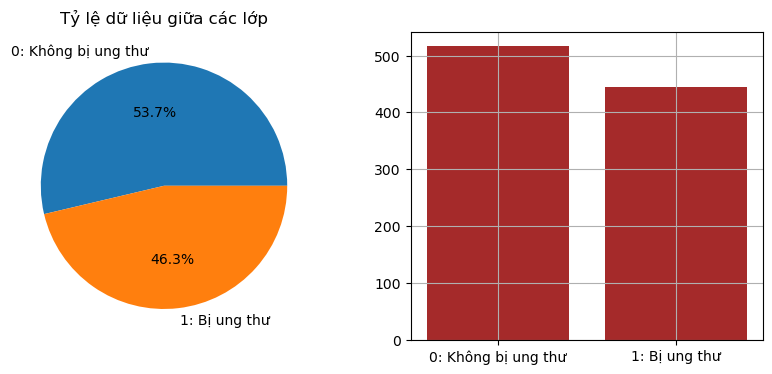

In [4]:
#Kiểm tra cân bằng dữ liệu
check = df['Target'].value_counts()

#Trực quan hoá dữ liệu bằng biểu đồ
label = ['0: Không bị ung thư','1: Bị ung thư']

plt.figure(figsize=(10,4))
#Vẽ biểu đồ tròn:
plt.subplot(1,2,1)
plt.pie(check.values, labels = label,
       autopct='%.1f%%')
plt.title('Tỷ lệ dữ liệu giữa các lớp')

#Vẽ biểu đồ cột:
plt.subplot(1,2,2)
plt.bar(label, check.values,
       color = 'brown')
plt.grid()
plt.show()

In [5]:
df.head()

,Age,Shape,Margin,Density,Target
0,4,0,0,0,1
1,2,1,1,0,1
2,3,2,0,0,1
3,1,1,1,0,0
4,4,1,0,0,1


In [6]:
X = df.loc[:,['Age', 'Shape', 'Margin', 'Density']].values
print('Kích thước biến X: ', X.shape)

Kích thước biến X:  (961, 4)


In [7]:
X

array([[4, 0, 0, 0],
       [2, 1, 1, 0],
       [3, 2, 0, 0],
       ...,
       [3, 2, 0, 0],
       [4, 2, 0, 0],
       [3, 0, 3, 0]], dtype=int64)

In [8]:
y = df.loc[:, 'Target'].values
print('Kích thước biến y: ', y.shape)

Kích thước biến y:  (961,)


In [9]:
y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

### 3. Tách tập dữ liệu ra tập Training - Test: 
---
1. Biến độc lập X --> X_train, X_test
2. Biến phụ thuộc y --> y_train, y_test

* Tập Training set (X_train, y_train): dùng để huấn luyện mô hình (80%)
* Tập Test set (X_test, y_test): dùng để kiểm thử mô hình (20%)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size = 0.75,
                                                   shuffle = True)
print('Tổng số mẫu trong tập dữ liệu: ', len(y))
print('Số mẫu X trong tập Train: ', len(X_train))
print('Số mẫu y trong tập Train: ', len(y_train))
print('Số mẫu X trong tập Test: ', len(X_test))
print('Số mẫu y trong tập Test: ', len(y_test))

Tổng số mẫu trong tập dữ liệu:  961
Số mẫu X trong tập Train:  720
Số mẫu y trong tập Train:  720
Số mẫu X trong tập Test:  241
Số mẫu y trong tập Test:  241


In [11]:
print(X_test)
print(y_test)

[[4 3 3 0]
 [3 1 1 0]
 [4 2 2 0]
 [2 3 1 0]
 [4 2 2 0]
 [4 2 0 0]
 [2 2 3 0]
 [1 1 1 0]
 [2 3 3 0]
 [3 0 1 3]
 [4 2 0 0]
 [3 0 3 0]
 [3 2 2 3]
 [4 2 3 0]
 [2 1 1 0]
 [3 2 2 0]
 [3 2 3 0]
 [3 1 1 0]
 [2 2 2 2]
 [4 2 0 0]
 [4 2 0 0]
 [3 2 3 0]
 [2 3 1 2]
 [1 1 1 0]
 [1 1 1 0]
 [3 2 2 2]
 [3 2 0 0]
 [3 3 1 2]
 [3 2 2 0]
 [3 0 3 0]
 [2 1 1 0]
 [3 0 1 0]
 [3 3 2 0]
 [4 2 2 0]
 [3 1 1 0]
 [3 2 0 0]
 [3 0 3 0]
 [4 2 2 0]
 [2 3 1 0]
 [2 1 1 0]
 [2 3 1 0]
 [4 1 1 0]
 [2 3 1 2]
 [4 2 2 0]
 [2 0 1 2]
 [4 2 1 0]
 [3 0 2 0]
 [3 0 2 3]
 [3 2 3 2]
 [4 0 1 2]
 [2 1 1 1]
 [3 1 1 0]
 [4 1 0 0]
 [2 1 1 0]
 [2 3 1 0]
 [4 3 1 0]
 [1 3 1 0]
 [3 2 3 0]
 [2 3 2 0]
 [2 3 1 0]
 [4 3 1 0]
 [4 0 2 0]
 [3 2 0 0]
 [3 2 4 0]
 [3 1 1 0]
 [3 3 1 0]
 [3 3 2 0]
 [4 3 2 0]
 [3 1 0 0]
 [3 2 2 0]
 [2 2 0 0]
 [2 3 1 0]
 [1 1 1 0]
 [2 2 2 0]
 [3 2 2 0]
 [3 3 1 0]
 [2 3 1 0]
 [3 2 2 0]
 [3 3 1 0]
 [2 3 1 0]
 [2 2 2 0]
 [3 2 0 0]
 [2 0 1 0]
 [4 1 1 1]
 [3 2 2 0]
 [3 2 2 0]
 [3 2 2 0]
 [3 0 2 0]
 [2 2 2 0]
 [4 2 0 0]
 [2 1 1 0]

### 4. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn:
sklearn.neighbors --> KNeighborsClassifier

#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_ungthu = KNeighborsClassifier(n_neighbors = 5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_ungthu.get_paras()

In [12]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_ungthu = KNeighborsClassifier(n_neighbors = 5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_ungthu.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


### 5. Huấn luyện mô hình
---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [13]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train, y_train)
KNN_ungthu.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
#Độ chính xác của model trên tập huấn luêynj: model.score(X_train, y_train)
acc_train = KNN_ungthu.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện: ', acc_train)
print('Độ chính xác % trên tập huấn luyện: ', round(acc_train*100,2))


Độ chính xác trên tập huấn luyện:  0.7583333333333333
Độ chính xác % trên tập huấn luyện:  75.83


## 6. Đánh giá độ chính xác của mô hình trên tập Test

In [15]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: model.predict(X_test)
y_pred = KNN_ungthu.predict(X_test)

In [16]:
#Kết quả dự đoán của mô hình trên tập test:
print(y_pred)
print(y_pred.shape)

[1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1]
(241,)


In [17]:
#So sánh kết quả dự đoán với kết quả thật cho 20 bệnh nhân đầu tiên:
print('Kết quả thật: ', y_test[:20])
print('Kết quả đoán: ', y_pred[:20])

Kết quả thật:  [0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1]
Kết quả đoán:  [1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1]


**Thông số để đánh giá độ chính xác mô hình phân lớp:**

---
1. Đếm số lượng mẫu dự đoán đúng trong tổng số mẫu của tập test:
2. Accauracy: là cách đơn giản và hay được sử dụng nhất; Tính tỷ lệ % giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.
3. Sử dụng ma trận nhầm lẫn (Confusion matrix)

In [18]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1.Đếm tổng số mẫu dự đoán đúng trên tập test: normalize=False
acc_test1 = accuracy_score(y_test, y_pred, normalize = False)
print('Tổng số mẫu dự đoán đúng: ', acc_test1, '/',len(y_test))

Tổng số mẫu dự đoán đúng:  195 / 241


In [19]:
152/193

0.7875647668393783

In [20]:
#2. độc chính xác(accuracy) theo tỉ lệ %
# số mẫu dự đoán đúng/tổng số mẫu của tập test: normalize = True
acc_test2 = accuracy_score(y_test, y_pred, normalize = True)
print('Độ chính xác của mô hình trên tập test ', acc_test2)
print('Độ chính xác % của mô hình trên tập test ', round(acc_test2*100,2))

Độ chính xác của mô hình trên tập test  0.8091286307053942
Độ chính xác % của mô hình trên tập test  80.91


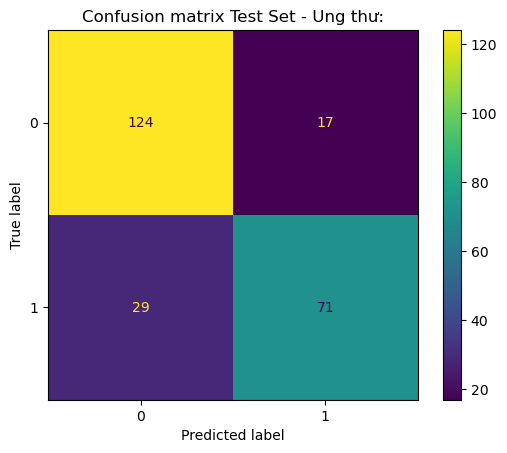

In [21]:
#3. sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_ungthu = confusion_matrix(y_test, y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Ung thư:')
plt.show()

### 7. Thay đổi tham số của mô hình
---
* n_neighbors: số điểm lân cận (K nên chọn là số lẻ)
* weights: Đánh trọng số cho các điểm lân cận**
    * Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

    * Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

## Lần 2

In [22]:
#Khai báo mô hình mới bằng cách thay đổi tham số n_neighbors, weights:
KNN_ungthu2 = KNeighborsClassifier(n_neighbors = 11)

#Các tham số mới vủa Model:
KNN_ungthu2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [23]:
#Thực hiển huấn luyện với dữ liệu tập train
KNN_ungthu2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [24]:
#Độ chính xác của Model trên tập huấn luyện
acc_train = KNN_ungthu2.score(X_train, y_train)

print('Độ chính xác trên tập huấn luyện: ', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện:  73.47


In [25]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu test
y_pred2 = KNN_ungthu2.predict(X_test)

print('Kết quả dự đoán bệnh nhân có bị ung thư hay không trên tập dữ liệu Test: ')
print('Kết quả cho 20 hành khách đầu tiên:')
print('Predictd label: ', y_pred2[:20])
print('Ground truth  : ', y_test[:20])

Kết quả dự đoán bệnh nhân có bị ung thư hay không trên tập dữ liệu Test: 
Kết quả cho 20 hành khách đầu tiên:
Predictd label:  [1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1]
Ground truth  :  [0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [26]:
#1. Đếm số mẫu dự đoán đúng:
acc21 = accuracy_score(y_test, y_pred2, normalize = False)
print('Tổng số mãu dự đoán đúng: ',acc21, '/', len(y_test))

Tổng số mãu dự đoán đúng:  188 / 241


In [27]:
#2. Độ chính xác %
acc22 = accuracy_score(y_test, y_pred2, normalize = True)

print('Độ chính xác của mô hình (k=11, weights = distance): ', acc22)
print('Độ chính xác theo %: ', round(acc22*100,2))

Độ chính xác của mô hình (k=11, weights = distance):  0.7800829875518672
Độ chính xác theo %:  78.01


Confusion matrix - Ung thư vú: 
[[119  22]
 [ 31  69]]


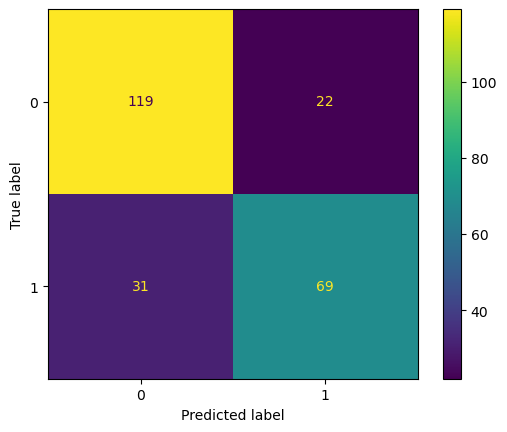

In [28]:
#3. Sử dụng ma trận confusion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#TÍnh toán ma trận
cnf_matrix_ungthu = confusion_matrix(y_test, y_pred2)

#Hiển thị ma trận:
print('Confusion matrix - Ung thư vú: ')
print(cnf_matrix_ungthu)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

## Lần 3

In [29]:
KNN_ungthu3 =KNeighborsClassifier(n_neighbors=15)
KNN_ungthu3.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

In [30]:
KNN_ungthu3.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [31]:
acc_train3 = KNN_ungthu3.score(X_train, y_train)
print('Độ chính xác % train: ' , round(acc_train3*100,2))

Độ chính xác % train:  77.08


In [32]:
y_pred3 = KNN_ungthu3.predict(X_test)
print(y_pred3[:20])
print(y_test[:20])

[1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1]
[0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [33]:
acc31 = accuracy_score(y_test, y_pred3, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc31, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 192  / 241


In [34]:
acc32 = accuracy_score(y_test, y_pred3,
                       normalize=True)

print('Độ chính xác của mô hình(k=11, weights=distance):', acc32)
print('Độ chính xác theo %:', round(acc32*100,2))

Độ chính xác của mô hình(k=11, weights=distance): 0.7966804979253111
Độ chính xác theo %: 79.67


Confusion matrix - Titanic:
[[107  34]
 [ 15  85]]


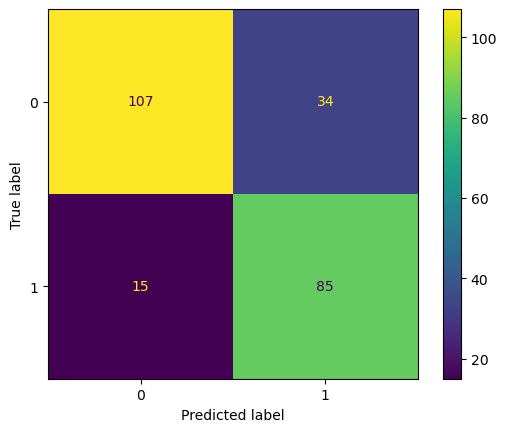

In [35]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_titanic = confusion_matrix(y_test,y_pred3)

#Hiển thị ma trân:
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.show()

In [36]:
#test đến khi tối ưu
#Giả sử mô hình KNN_ungthu2 tốt hơn, độ chính xác chấp nhận được --> dùng mô hình này để đi dự đoán

## 8. Sử dụng mô hình
--- 
* 1.Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* 2.Shape: Hình dáng ( 0: Lobular, 1: Round, 2:Oval )
* 3.Margin: Viền ( 0: Spiculated, 1: Circumscribed, 2: ill-defined, 3: Obscured, 4: Microlobulated)
* 4.Density: Tỉ trọng ( 0: Low, 1: High, 2: Iso, 3: Fat-containing)
* 5.Target: Kết quả ( 0: Không bị ung thư, 1: Bị ung thư)

In [37]:
df.head()

,Age,Shape,Margin,Density,Target
0,4,0,0,0,1
1,2,1,1,0,1
2,3,2,0,0,1
3,1,1,1,0,0
4,4,1,0,0,1


In [38]:
#Khai báo dữ liệu bệnh nhân 1:

age = 1
shape = 1
margin = 1
density = 0

patient1 = np.array([[age,shape,margin,density]])
print(patient1)

[[1 1 1 0]]


In [39]:
#Sử dụng mô hình để dự đoán cho bệnh nhân 1:
y_pred_1 = KNN_ungthu2.predict(patient1)
if(y_pred_1 == 0):
    print('Bạn không bị ung thư: ', y_pred_1)
else:
    print('Bạn đã bị ung thư: ', y_pred_1)

Bạn không bị ung thư:  [0]


In [40]:
#Khai báo dữ liệu bệnh nhân 2:

age2 = 2
shape2 = 1
margin2 = 1
density2 = 1

patient2 = np.array([[age2,shape2,margin2,density2]])
print(patient2)

[[2 1 1 1]]


In [41]:
#Sử dụng mô hình để dự đoán cho bệnh nhân 2:
y_pred_2 = KNN_ungthu2.predict(patient2)
if(y_pred_2 == 0):
    print('Bạn không bị ung thư: ', y_pred_2)
else:
    print('Bạn đã bị ung thư: ', y_pred_2)

Bạn không bị ung thư:  [0]
